In [1]:
import random
import string
import RNA
import numpy as np
import os
import subprocess
from PIL import Image 
from IPython.display import SVG, display
from collections import deque 
import difflib
import sys

import logging # doesn't print anything, unless a root logger is created
logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
err = lambda x: logging.error(x)
deb = lambda x: logging.debug(x)
inf = lambda x: logging.info(x)
inf(f'hello!')

import importlib # always reload all .py files / observe changes

In [7]:
# from collections import defaultdict
# from scipy.ndimage.filters import gaussian_filter
# import math
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics.pairwise import euclidean_distances
from scipy.optimize import dual_annealing
# import RNA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# from scipy import optimize
# from matplotlib.collections import LineCollection, CircleCollection, EllipseCollection
# import matplotlib.patheffects as path_effects




In [3]:
import vis
importlib.reload(vis)

sequence = "GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA"
s1 = "(((((((((((((((.((((.....((((((.....)))))).))))))))))).........))))))))."
s2 = "((((((((.....((.((((.....((((((.....)))))).))))))(((.......))).))))))))."
s3 = "((((((...((((.......)))).((((((.....)))))).....(((((.......))))).))))))."
# s1 = "((((((.((((((.......)))).((((((.....)))))).))..(((((.......))))).))))))."

# sequence = "UCACGACACCCCUCAACUAUAACAACGGUCCGUACAUACUAGCCCUGCAAUGGAACGGGCAGGGCCAGCACAGGUGGGGCGCCCGCUUGGGGGAUCAAAUGUGUGAUCCAGAUACUUUAGACGCGUGCAGAACUUUUUAGAUCGAUCAGUGGGAACAGGCAUUGAUUAUGAAAUCAAUUAGGGGGUUUAGGACCGCACCACAAACUGCGGGAGGGCACGCUUUGGUUCCUGUGUUACGCUAAUCCUCUAGCCACGGAGGGCUUCUUCGUACAAUGAUUGGGUUACCAGGGUUCCAGUGUG"
# s1 = ".........(((((.(((........)))............(((((((..........))))))).....((((((((...))))))))..((((((......))))))......(((((((.(.(........(((((....((((((((........)))))))).))))).......).).))))))).(((((........))))))))))((((((..((.(((((.((.((.((((((........((((((.....)))))).....)))))))).)))))))..))))))))"

# sequence = "GUUGGGGUAGGGGCCCGACUAAUAGCAGUUCUUUGACAAUUCUUCUGCGUUAUUCAUUUUGAUAACAAUUAUUAUAUAAGUGCUGGAAAGCCAACCAUAUCGGCCUUAAUCCCCAACAGAAAACCUUCACGAGUGGGGUCGGUUUCGCAAUUCCUUGCGUGAGAGCCGAGGUUGGUUACAUGAGAAUAACCACGCCGAAC"
# s1 = "(((((((..((((((.((.((((.((((................)))))))).))((((..((((......))))..))))..(((....)))........))))))...))))))).......((.((((...((((..............)))).))))))...((..((.(((((........)))))))..))..."

# sequence = "CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGAGCCUUAAACUCUUGAUUAUGAAGUG"
# s1       = "(((((((((...(((((((.......)))))))........((((((.......))))))..)))))))))"

Plot = vis.pyrnaplot(sequence, s1)
c1 = Plot.coords_naview = Plot.get_naview_coords(rotate=20)
Plot = vis.pyrnaplot(sequence, s2)
c2 = Plot.coords_naview = Plot.get_naview_coords(rotate=20)
Plot = vis.pyrnaplot(sequence, s3)
c3 = Plot.coords_naview = Plot.get_naview_coords(rotate=20)


In [4]:
metric = "euclidean"
arr = cdist(c1, c2, metric=metric)
values = arr.ravel()
values.sort()
midpoint = int(len(values)/2)
values[0:midpoint].sum()

200690.53092958318

Status : ['Maximum number of iteration reached']
Total Evaluations: 12232
Solution: f([18.81016851 68.31161286 -6.36179737 16.86452861 26.18247145 -5.35275074]) = 1352381.51886


<AxesSubplot:>

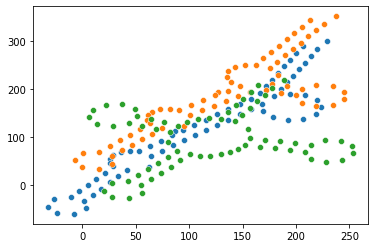

In [5]:

def matrix_rotation(p, origin=(0, 0), degrees=0):
    # cite source
    if not origin:
        origin = p.mean(axis=0)
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


# objective function
def objective(bounds):

    x1, y1, r1, x2, y2, r2 = bounds
    c2b = matrix_rotation(c2, origin=False, degrees=r1) + (x1,y1)
    # c2b = c2+ (x1,y1)

    metric = "euclidean"
    # metric = "hamming"

    dist1 = cdist(c1, c2b, metric=metric).sum()
    # dist1 = pdist(np.abs(c2b-c1), metric=metric).sum()

    c3b = matrix_rotation(c3, origin=False, degrees=r2) + (x2,y2)
    dist2 = cdist(c2b, c3b, metric=metric).sum()
    # dist2 = pdist(np.abs(c3b-c2b), metric=metric).sum()
    # dist2 = 0
    # values = cdist(c2b, c3b, metric=metric)
    # values = arr.ravel()
    # values.sort()
    # midpoint = int(len(values)/2)
    # dist2 = values[midpoint:].sum()

    return dist1+dist2
    # return dist1*0.2 + dist2*0.8

 
# define range for input
x1limits = -150.0, 150.0
y1limits = -150.0, 150.0
r1limits = -45, 45

x2limits = -150.0, 150.0
y2limits = -150.0, 150.0
r2limits = -45, 45

# define the bounds on the search
bounds = [x1limits, y1limits, r1limits, x2limits, y2limits, r2limits]



# perform the dual annealing search
result = dual_annealing(objective, bounds)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

# 784188.24215
x1, y1, r1, x2, y2, r2 = solution

# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(8, 8)

# r1 = 0
c2b = matrix_rotation(c2, origin=False, degrees=r1) + (x1,y1)
c2b = c2b + (x1,y1)

c3b = matrix_rotation(c3, origin=False, degrees=r2)
c3b = c3b + (x2,y2)

sns.scatterplot(x=c1[:,0], y=c1[:,1])
sns.scatterplot(x=c2b[:,0], y=c2b[:,1])
sns.scatterplot(x=c3b[:,0], y=c3[:,1])


(((((((((((((((.((((.....((((((.....)))))).))))))))))).........)))))))).
((((((((.....((.((((.....((((((.....)))))).))))))(((.......))).)))))))).
Status : ['Maximum number of iteration reached']
Total Evaluations: 6073
Solution: f([11.48503324 68.83511253 93.63785927]) = 714388.99349
-
((((((((.....((.((((.....((((((.....)))))).))))))(((.......))).)))))))).
((((((...((((.......)))).((((((.....)))))).....(((((.......))))).)))))).
Status : ['Maximum number of iteration reached']
Total Evaluations: 6121
Solution: f([ 1.53032323 23.44295262 94.64642697]) = 637992.52536
-
((((((...((((.......)))).((((((.....)))))).....(((((.......))))).)))))).
((((((.((((((.......)))).((((((.....)))))).))..(((((.......))))).)))))).
Status : ['Maximum number of iteration reached']
Total Evaluations: 6081
Solution: f([17.60084079 42.82522664 93.55221883]) = 586287.46189
-


[array([[ -85.53030434,  113.62690438],
        [ -70.65980048,  115.59368005],
        [ -55.78929662,  117.56045572],
        [ -40.91879541,  119.52724642],
        [ -26.04829156,  121.49402209],
        [ -11.17780537,  123.46081014],
        [   3.69269848,  125.42758581],
        [  18.56319969,  127.39437651],
        [  33.53422825,  126.46253176],
        [  48.04606036,  122.66691699],
        [  62.55789247,  118.87130222],
        [  77.06972458,  115.07568745],
        [  91.58155668,  111.28007268],
        [ 106.09339631,  107.48445924],
        [ 120.60522842,  103.68884447],
        [ 127.21745783,   98.62143462],
        [ 135.82321701,  100.05648734],
        [ 150.4849085 ,   96.88871893],
        [ 165.14659999,   93.72095052],
        [ 179.80829523,   90.55318278],
        [ 183.19965364,   82.17565542],
        [ 189.69666653,   76.03226478],
        [ 198.06837084,   73.17681868],
        [ 206.77360031,   74.05041641],
        [ 214.24460489,   78.41527934],


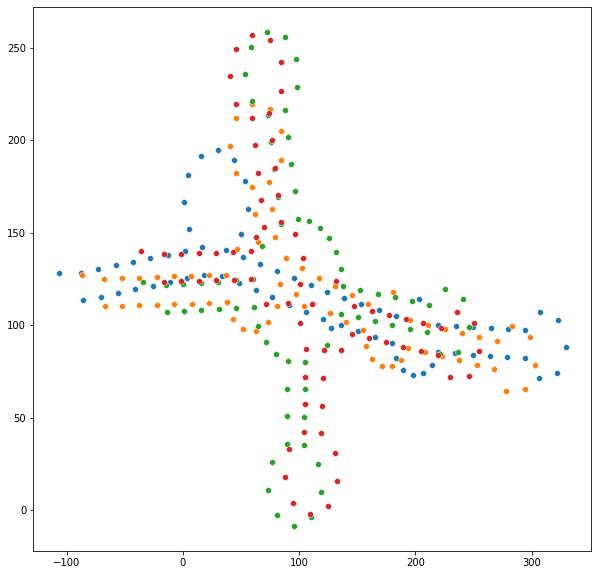

In [8]:
sequence   = "GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA"
structures = ["(((((((((((((((.((((.....((((((.....)))))).))))))))))).........)))))))).",
              "((((((((.....((.((((.....((((((.....)))))).))))))(((.......))).)))))))).",
              "((((((...((((.......)))).((((((.....)))))).....(((((.......))))).)))))).",
              "((((((.((((((.......)))).((((((.....)))))).))..(((((.......))))).))))))."]


def min_distances(sequence, structures, init_rotation=0, xylimit = 150, rlimit = 180):
    
    xylimit = -xylimit, xylimit
    rlimit = -rlimit, rlimit

    # list of numpy 2d arrays
    coordinates = [vis.pyrnaplot(sequence, s).get_naview_coords() for s in structures]

    if init_rotation != 0:
        coordinates[0] = matrix_rotation(coordinates[0], origin=False, degrees=-init_rotation)

    bounds = [xylimit, xylimit, rlimit, xylimit, xylimit, rlimit]
    bounds = [xylimit, xylimit, rlimit]

    def objective(bounds):
        # function for annealing optimization

        x1, y1, r1 = bounds
        c2_temp = matrix_rotation(c2, origin=False, degrees=r1) + (x1,y1)
        # c2b = c2+ (x1,y1)

        metric = "euclidean"
        # metric = "hamming"

        dist1 = cdist(c1, c2_temp, metric=metric).sum()

        return dist1

    
    # def objective(bounds):
    #     # function for annealing optimization
    #     x1, y1, r1, x2, y2, r2 = bounds
    #     c2b = matrix_rotation(c2, origin=False, degrees=r1) + (x1,y1)
    #     # c2b = c2+ (x1,y1)
    #     metric = "euclidean"
    #     # metric = "hamming"

    #     dist1 = cdist(c1, c2b, metric=metric).sum()
    #     # dist1 = pdist(np.abs(c2b-c1), metric=metric).sum()

    #     c3b = matrix_rotation(c3, origin=False, degrees=r2) + (x2,y2)
    #     dist2 = cdist(c2b, c3b, metric=metric).sum()
    #     # dist2 = pdist(np.abs(c3b-c2b), metric=metric).sum()
    #     # dist2 = 0
    #     # values = cdist(c2b, c3b, metric=metric)
    #     # values = arr.ravel()
    #     # values.sort()
    #     # midpoint = int(len(values)/2)
    #     # dist2 = values[midpoint:].sum()

    #     return dist1+dist2
    #     # return dist1*0.2 + dist2*0.8


    for i in range(0, len(structures)-1):

        s1 = structures[i]
        s2 = structures[i+1]

        c1 = coordinates[i]
        c2 = coordinates[i+1]

        print (s1)
        print (s2)
        
        # perform the dual annealing search
        result = dual_annealing(objective, bounds)
        # summarize the result
        print('Status : %s' % result['message'])
        print('Total Evaluations: %d' % result['nfev'])
        # evaluate solution
        solution = result['x']
        evaluation = objective(solution)
        print('Solution: f(%s) = %.5f' % (solution, evaluation))

        x1, y1, r1 = solution
        coordinates[i+1] = matrix_rotation(c2, origin=False, degrees=r1) + (x1,y1)


        print ("-")


    fig = plt.figure(figsize=(10, 10), dpi=72)
    for c in coordinates:
        sns.scatterplot(x=c[:,0], y=c[:,1])

    return coordinates


min_distances(sequence, structures, init_rotation=-100)